In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [8]:
# 1. Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=columns)

In [9]:
# 2. Report general statistics of the dataset
print("General Statistics:")
print(df.info())
print(df.describe())
print(f"Number of Rows: {df.shape[0]}, Number of Features: {df.shape[1]}")

General Statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   

<Figure size 1200x600 with 0 Axes>

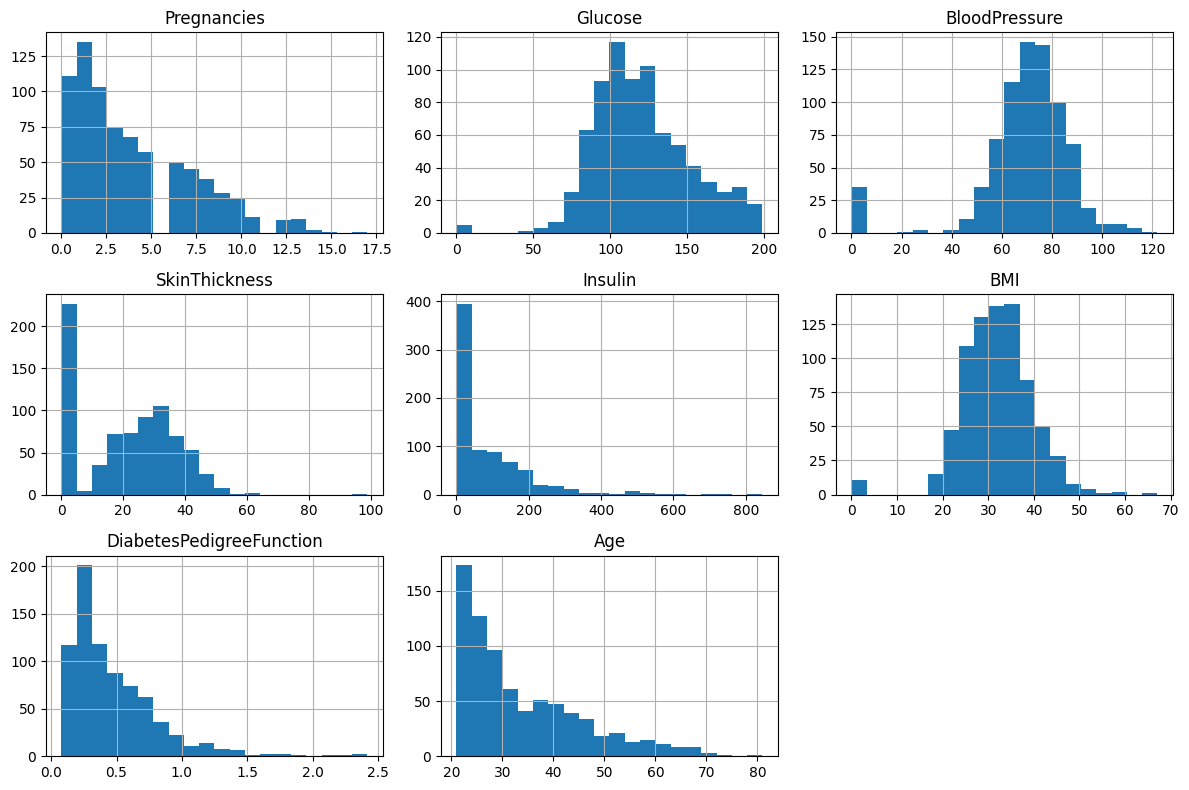

In [10]:
# 3. Report categorical and continuous features
categorical_features = ['Outcome']
numerical_features = [col for col in df.columns if col not in categorical_features]

plt.figure(figsize=(12, 6))
df[numerical_features].hist(bins=20, figsize=(12, 8), layout=(3, 3))
plt.tight_layout()
plt.show()


In [11]:
# 4. Find outliers using Z-score and IQR
z_scores = np.abs(stats.zscore(df[numerical_features]))
outliers_z = (z_scores > 3).sum()
print("Outliers detected using Z-score:")
print(outliers_z)

Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).sum()
print("Outliers detected using IQR:")
print(outliers_iqr)

Outliers detected using Z-score:
93
Outliers detected using IQR:
Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
dtype: int64


In [18]:
# 5. Report missing values and treat them
def missing_values_report(df):
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
    return missing_df[missing_df['Missing Values'] > 0]

print("Missing Values Report (NaN values):")
print(missing_values_report(df))

# بررسی مقادیر صفر که ممکن است مقدار گمشده باشند
zero_replacement_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
zero_counts = (df[zero_replacement_features] == 0).sum()
print("\nFeatures with zero values (possible missing values):")
print(zero_counts)

Missing Values Report (NaN values):
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

Features with zero values (possible missing values):
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [19]:
# 6. Replace zero values with median for medical features
zero_replacement_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for feature in zero_replacement_features:
    df[feature] = df[feature].replace(0, df[feature].median())

In [20]:
# 7. Normalize the dataset
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("Data Normalized Successfully!")

Data Normalized Successfully!


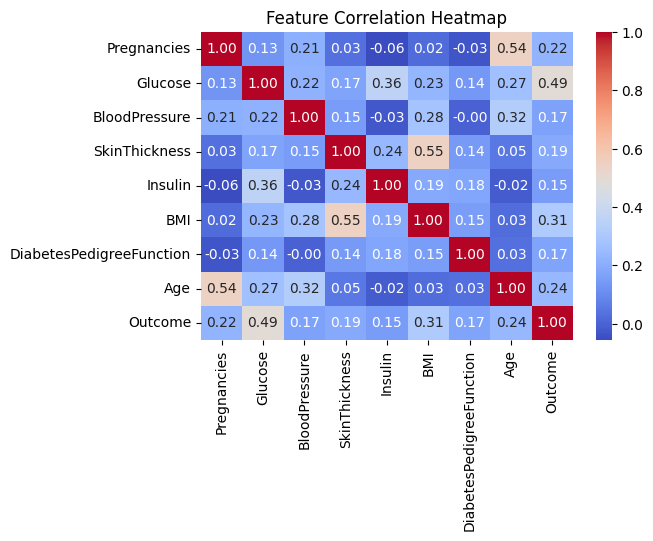

In [24]:
# 8. Visualize important relationships between features
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# 9. Save the final cleaned dataset
df.to_csv("pima_cleaned.csv", index=False)
print("Final cleaned dataset saved as 'pima_cleaned.csv'")

Final cleaned dataset saved as 'pima_cleaned.csv'
